<a href="https://colab.research.google.com/github/madhavi4-latha/Fake_News_Detection_Hack_A_Roo/blob/main/project2s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the Dataset:
1.id: unique id for a news article
2.title: the title of a news article
3.author: author of the news article
4.text: the text of the article; could be incomplete
5.label: a label that marks whether the news article is real or fake:
          1: Fake news
          0: real News 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# loading the dataset to a pandas DataFrame
my_dataset = pd.read_csv('/content/sample_data/train.csv')

In [ ]:
my_dataset.shape

(20800, 5)

In [ ]:
# print the first 5 rows of the dataframe
my_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# titles = my_dataset["title"]
# labels = my_dataset["label"]

In [ ]:
# x=[]
# y=[]

In [ ]:
x=list(titles)
y=list(labels)

**Data Cleaning**

In [ ]:
# counting the number of missing values in the dataset
my_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# replacing the null values with empty string
my_dataset = my_dataset.fillna('')

Data Exploration

In [ ]:
my_dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


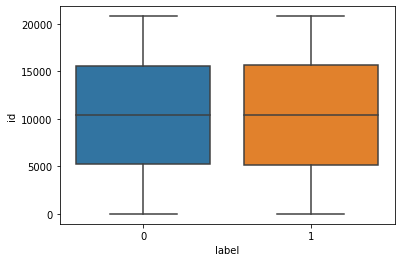

In [ ]:
plot = sns.boxplot(x='label',y="id",data=my_dataset)

In [ ]:
#print(my_dataset.groupby("label")('1').count())
# data.groupby([‘target’])[‘text’].count().plot(kind=”bar”)
# plt.show()

In [ ]:
# merging the author name and news title
my_dataset['content'] = my_dataset['author']+' '+my_dataset['title']

In [ ]:
print(my_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# separating the data & label
X = my_dataset.drop(columns='label', axis=1)
Y = my_dataset['label']

In [ ]:
print(X)


          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [ ]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
my_dataset['content'] = my_dataset['content'].apply(stemming)

In [ ]:
print(my_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
X = my_dataset['content'].values
Y = my_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


Data Analysis and Visualization

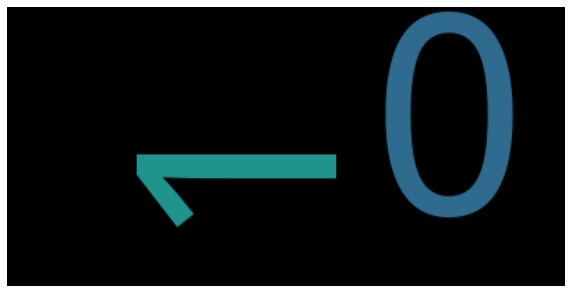

In [ ]:
#Analyzing the frequency of news with word cloud(Data Visualization Technique)
from wordcloud import WordCloud
fake_data = my_dataset[my_dataset["label"] == "1"]
all_words = ' '.join([text for text in fake_data.text])
counts = my_dataset['label'].value_counts()
counts.index = counts.index.map(str)
wordcloud = WordCloud().generate_from_frequencies(counts)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Analysing number of false and true news
c_real = 0
c_false = 0
for i in Y:
  if Y[i]==0:
    c_real=c_real+1
  else :
    c_false = c_false+1
print("Number of real news: "+ str(c_real))
print("Number of false news: "+ str(c_false))

Number of real news: 10413
Number of false news: 10387


([<matplotlib.patches.Wedge at 0x7f15c2c2f110>,
 [Text(-0.0023562469051222937, 1.1999976867063213, 'False'),
  Text(0.00235624690512188, -1.1999976867063213, 'Real')],
 [Text(-0.0013744773613213377, 0.6999986505786873, '50.1%'),
  Text(0.0013744773613210966, -0.6999986505786873, '49.9%')])

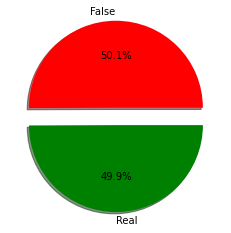

In [ ]:
#Visualizing percentage of fake and real news by cateogery in train file
label_size =[c_real,c_false]
plt.pie(label_size,explode=[0.1,0.1],colors=['red','green'],shadow=True,labels=['False','Real'],autopct='%1.1f%%')

In [ ]:
# width =0.3
# plt.bar(np.arange(c_real, c_real, width=width)
# plt.bar(np.arange(len(Y))+ width, Y, width=width)
# plt.show()

In [ ]:
Y.shape
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
# converting the textual data to numerical data 
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

splitting the data set in to training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

In [ ]:
print(X_train)

  (0, 11684)	0.5070580156214289
  (0, 10315)	0.39867999740572146
  (0, 5147)	0.5278034356036302
  (0, 114)	0.5526028970496242
  (1, 15611)	0.34068220157778806
  (1, 12693)	0.33794458026137175
  (1, 10306)	0.11725436798714685
  (1, 10289)	0.35264942087438866
  (1, 6816)	0.21005241836193117
  (1, 5233)	0.2782015960508413
  (1, 4680)	0.2805114469722502
  (1, 4068)	0.3514994338166583
  (1, 2813)	0.2105814708038776
  (1, 2526)	0.3320399992928536
  (1, 1954)	0.3914934354594198
  (2, 16704)	0.32002037998152355
  (2, 12430)	0.32002037998152355
  (2, 10611)	0.31787162360806587
  (2, 9082)	0.33295341853189286
  (2, 6383)	0.2810399578483559
  (2, 5390)	0.3797958930662605
  (2, 3105)	0.29715407865561705
  (2, 2526)	0.23906998304316238
  (2, 2070)	0.29971898869481917
  (2, 1983)	0.2892920262544172
  :	:
  (14557, 8026)	0.4341030219850026
  (14557, 6398)	0.36578019031535824
  (14557, 3648)	0.34411587758353523
  (14557, 908)	0.2293218471469665
  (14557, 536)	0.2592097704417449
  (14558, 15231)	0.2218

In [ ]:
print(X_test)

  (0, 15705)	0.45003463066461935
  (0, 13463)	0.27408268150674925
  (0, 12305)	0.2670868113223411
  (0, 9872)	0.2952009846812773
  (0, 5599)	0.2667477556464323
  (0, 4094)	0.3615652927181354
  (0, 3326)	0.432231674736212
  (0, 1236)	0.31141866041273353
  (0, 368)	0.2796048998537153
  (1, 15173)	0.42575771209033225
  (1, 14572)	0.3876959831513743
  (1, 11092)	0.2640956935704667
  (1, 7395)	0.3737192892699826
  (1, 6774)	0.3969651256507491
  (1, 4222)	0.2837890310876728
  (1, 2462)	0.354944314618474
  (1, 2144)	0.30806908491504775
  (2, 15582)	0.13233753904564444
  (2, 14524)	0.3003056663043611
  (2, 11886)	0.350980425781301
  (2, 10749)	0.3665403200383284
  (2, 10174)	0.3799069003178553
  (2, 7824)	0.226689047951983
  (2, 4533)	0.42885343252619573
  (2, 4530)	0.32675030353054124
  :	:
  (6237, 1894)	0.11007362902863657
  (6237, 1425)	0.25025997923501425
  (6237, 350)	0.21126676090780142
  (6238, 11506)	0.3806498882273162
  (6238, 9155)	0.43610084301214197
  (6238, 7824)	0.23647345593803

In [ ]:
X_test.data

array([0.45003463, 0.27408268, 0.26708681, ..., 0.33731658, 0.20326242,
       0.19986087])

In [ ]:
type(X_test)

scipy.sparse.csr.csr_matrix

In [ ]:
X_test.shape

(6240, 17128)

In [ ]:
type(X_test.shape)

tuple

In [ ]:
i = X_test.shape[0]

In [ ]:
j= i-1
print(j)

6239


In [ ]:
X_test.nnz

63309

In [ ]:
print(Y_train)
print(len(Y_train))

[1 1 1 ... 0 1 0]
14560


In [ ]:
print(Y_test)

[1 1 0 ... 0 0 1]


([<matplotlib.patches.Wedge at 0x7f15c6265050>,
 [Text(-0.705342266393061, 0.9708204196655015, 'Train'),
  Text(0.7053422663930609, -0.9708204196655015, 'Test')],
 [Text(-0.41144965539595224, 0.5663119114715425, '70.0%'),
  Text(0.41144965539595213, -0.5663119114715425, '30.0%')])

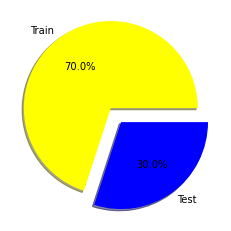

In [ ]:
#visualizing test data and train data
label_size =[len(Y_train),len(Y_test)]
plt.pie(label_size,explode=[0.1,0.1],colors=['Yellow','blue'],shadow=True,labels=['Train','Test'],autopct='%1.1f%%')

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9850961538461539


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9743589743589743


In [ ]:
print("Enter the val needs to be tested to know whether the news is fake or not")
print("The value must be between 0 and "+ str(j) + " as this is the range of test data")
val = int(input())

Enter the val needs to be tested to know whether the news is fake or not
The value must be between 0 and 6239 as this is the range of test data
600


In [ ]:
try:
    X_new = X_test[val]
    #X_new = X_test[3]
    prediction = model.predict(X_new)
    view =model.predict_proba(X_new)
    print(prediction)
    print(view)
    if (prediction[0]==0):
      print('The news is Real')
    else:
      print('The news is Fake')
except:
    print("Out of range")

[1]
[[0.12596282 0.87403718]]
The news is Fake


In [ ]:
try:
 print(Y_test[val])
except:
  print("Out of range")


1
